In [16]:
import numpy as np
from fashion_mnist.utils import mnist_reader
import matplotlib.pyplot as plt
import pickle

In [17]:
X_train, y_train = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='t10k')

In [18]:
labelDct = {0:"top", 1:"trousers", 2: "pullover", 3:"dress", 4: "coat", 5: "sandal", 6:"shirt", 7:"sneaker",8:"bag",9:"boot"}

dim = len(X_train[0])

In [19]:
def trainPerceptron(X_train, y_train, classList):
    
    dim = len(X_train[0])
    
    weightDct = {}
    indexDct = {}
    scores = {x:0 for x in classList}
    
    mList = [len(classList)*3000]*20
    oldMean = np.mean(mList)
    oldoldMean = np.mean(mList)
    
    mMin = len(classList)*3000
    
    for classifier in classList:
        
        indexDct.update({classifier:[]})
        weightDct.update({classifier:np.zeros(dim + 1)})

    for index, value in enumerate(y_train):
        if value in classList:
            
            indexDct[value].append(index)


    notLinearlySeparated = True

    iterations = 0
    while notLinearlySeparated:
        m = 0
        for y, indexList in indexDct.items():
            
            for index in indexList:

                x = np.append(X_train[index],1)
                
                for classifier, w in weightDct.items():
                    scores[classifier] = np.dot(w,x)
                
                maxScorer = max(scores, key=scores.get)
                
                if maxScorer != y:
                
                    maxScore = scores[maxScorer]
                    weightDct[maxScorer] -= x
                    weightDct[y] += x
                    m += 1
                
        iterations += 1
        
        mList.pop(0)
        mList.append(m)
        
        if m <= mMin:
            wBest = weightDct

        if m == 0:
            notLinearlySeparated = False
            print("Separated training data in {} iterations!".format(iterations))
        elif iterations > 250:
            print("Failed to separate data over {} iterations!".format(iterations))
            notLinearlySeparated = False
        
        if (iterations % 15 == 0):
            newMean = np.mean(mList)
            
            if newMean > 1.1 * oldMean and newMean > 1.1 * oldoldMean:
                print("Failed to separate data over {} iterations, m not converging".format(iterations))
                print("Old old mean: {}, Old mean: {}, new mean: {}".
                      format(round(oldoldMean,3),round(oldMean,3), round(newMean,3)))
                notLinearlySeparated = False
            else:
                oldoldMean = oldMean
                oldMean = newMean

    return wBest, notLinearlySeparated

def testPerceptron(weightDct, X_test, y_test, classList):
    
    indexDct = {}
    scores = {x:0 for x in classList}
    
    for classifier in classList:
        
        indexDct.update({classifier:[]})

    for index, value in enumerate(y_test):
        if value in classList:
            
            indexDct[value].append(index)

    correct = 0
    incorrect = 0

    for y, indexList in indexDct.items():

        for index in indexList:

            x = np.append(X_test[index],1)

            for classifier, w in weightDct.items():
                scores[classifier] = np.dot(w,x)

            maxScorer = max(scores, key=scores.get)

            if maxScorer == y:
                correct +=1
            else:
                incorrect +=1
                    
    percScore = correct/(correct+incorrect)
    return percScore

def evalClassPair(classList, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    
    weightDct, unseparable = trainPerceptron(X_train, y_train, classList)

    score = testPerceptron(weightDct, X_test, y_test, classList)
    print("The class list {} scored {}%!".format([labelDct[i] for i in classList],round(score*100,2)))
    return score


In [89]:
scoresArray = np.zeros((10,10,10))

for i in labelDct.keys():
    for j in labelDct.keys():
        for k in labelDct.keys():
            if j > i and k > j:
                scoresArray[i,j,k] = evalClassPair([i,j,k])


Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'pullover'] scored 67.7%!
Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'dress'] scored 48.43%!
Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'coat'] scored 82.23%!
Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'sandal'] scored 92.17%!
Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'shirt'] scored 57.5%!
Failed to separate data over 105 iterations, m not converging
Old old mean: 9.55, Old mean: 9.9, new mean: 11.3
The class list ['top', 'trousers', 'sneaker'] scored 77.37%!
Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'bag'] scored 76.03%!
Failed to separate data over 251 iterations!
The class list ['top', 'trousers', 'boot'] scored 92.97%!
Failed to separate data over 60 iterations, m not converging
Old old mean: 15.5, Old mean: 18.4, new 

Failed to separate data over 251 iterations!
The class list ['pullover', 'coat', 'sandal'] scored 67.93%!
Failed to separate data over 120 iterations, m not converging
Old old mean: 16.8, Old mean: 17.95, new mean: 20.25
The class list ['pullover', 'coat', 'shirt'] scored 33.53%!
Failed to separate data over 251 iterations!
The class list ['pullover', 'coat', 'sneaker'] scored 67.33%!
Failed to separate data over 251 iterations!
The class list ['pullover', 'coat', 'bag'] scored 58.43%!
Failed to separate data over 60 iterations, m not converging
Old old mean: 9.3, Old mean: 9.45, new mean: 11.2
The class list ['pullover', 'coat', 'boot'] scored 66.6%!
Failed to separate data over 251 iterations!
The class list ['pullover', 'sandal', 'shirt'] scored 63.13%!
Failed to separate data over 251 iterations!
The class list ['pullover', 'sandal', 'sneaker'] scored 86.63%!
Failed to separate data over 251 iterations!
The class list ['pullover', 'sandal', 'bag'] scored 73.8%!
Failed to separate d

KeyboardInterrupt: 

In [97]:
classPairList = []
for i in labelDct.keys():
    for j in labelDct.keys():
        if j > i:
            classPairList.append([i,j])

In [1]:
with open('mclassPerceptron.p', 'wb') as fp:
    pickle.dump(scoresArray, fp)

NameError: name 'scoresArray' is not defined

In [4]:
with open('mclassPerceptron.p', 'rb') as fp:
    scoresArray = pickle.load(fp)

In [22]:
i = 5
j = 6
k = 7
while i < 10:
    j = 0
    while j <10:
        k = 0
        while k<10:
            if j > i and k > j:
                scoresArray[i,j,k] = evalClassPair([i,j,k])
            k+=1
        j+=1
    i+=1


Failed to separate data over 251 iterations!
The class list ['sandal', 'shirt', 'sneaker'] scored 87.73%!
Failed to separate data over 251 iterations!
The class list ['sandal', 'shirt', 'bag'] scored 71.87%!
Failed to separate data over 251 iterations!
The class list ['sandal', 'shirt', 'boot'] scored 91.43%!
Failed to separate data over 251 iterations!
The class list ['sandal', 'sneaker', 'bag'] scored 84.37%!
Failed to separate data over 251 iterations!
The class list ['sandal', 'sneaker', 'boot'] scored 67.33%!
Failed to separate data over 251 iterations!
The class list ['sandal', 'bag', 'boot'] scored 86.2%!
Failed to separate data over 251 iterations!
The class list ['shirt', 'sneaker', 'bag'] scored 50.2%!
Failed to separate data over 251 iterations!
The class list ['shirt', 'sneaker', 'boot'] scored 83.63%!
Failed to separate data over 251 iterations!
The class list ['shirt', 'bag', 'boot'] scored 73.77%!
Failed to separate data over 251 iterations!
The class list ['sneaker', 'b

In [24]:
completeArray = scoresArray
for i in labelDct.keys():
    for j in labelDct.keys():
        for k in labelDct.keys():
            completeArray[i,j,k] = scoresArray[i,j,k]
            completeArray[k,i,j] = scoresArray[i,j,k]
            completeArray[j,k,i] = scoresArray[i,j,k]
            completeArray[i,k,j] = scoresArray[i,j,k]
            completeArray[k,j,i] = scoresArray[i,j,k]
            completeArray[j,i,k] = scoresArray[i,j,k]

In [36]:
def plotter(labelDct, scores2D, clothingLabel):
    fig, ax = plt.subplots()        

    for i in range(0,10):
        for j in range(0,10):

            text = ax.text(j, i, round(scores2D[i, j],1),
                   ha="center", va="center", color="r")

    ax.imshow(scores2D, cmap = 'Blues', vmin = 30, vmax = 100)    

    # We want to show all ticks...
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    # ... and label them with the respective list entries
    ax.set_xticklabels([labelDct[key] for key in labelDct.keys()])
    ax.set_yticklabels([labelDct[key] for key in labelDct.keys()])
    ax.set_ylabel("Clothing pieces")
    ax.set_xlabel("Clothing pieces")

    fig.set_figheight(9)
    fig.set_figwidth(9)

    ax.set_title("Perceptron performance slice - 3rd clothing item: {}".format(clothingLabel))
    fig.tight_layout()
    plt.show()

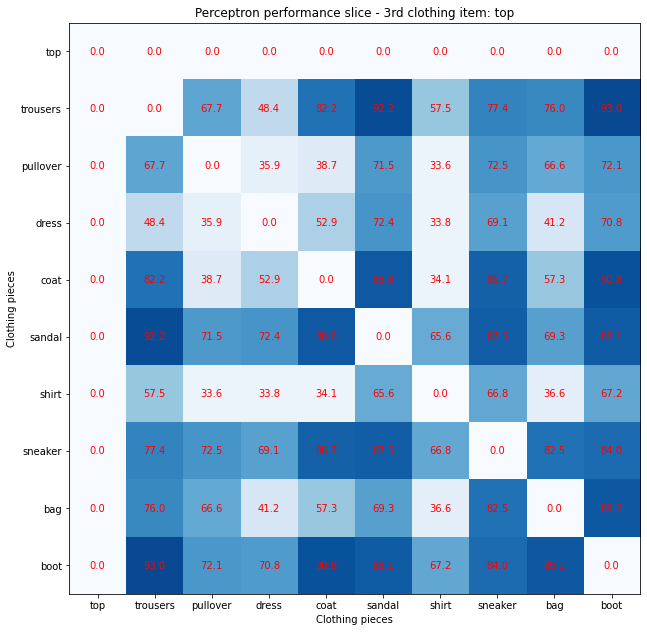

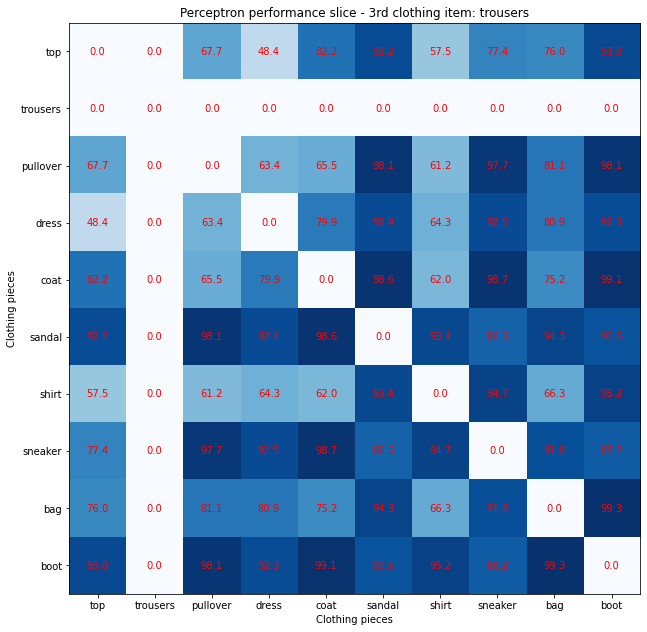

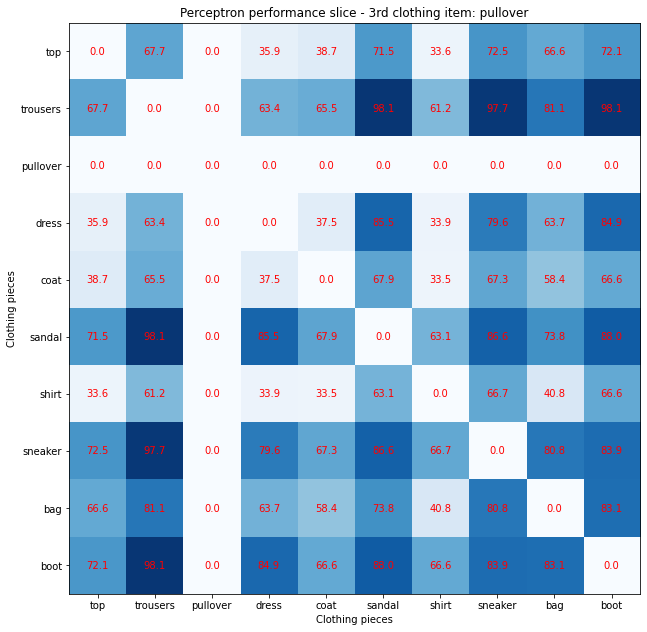

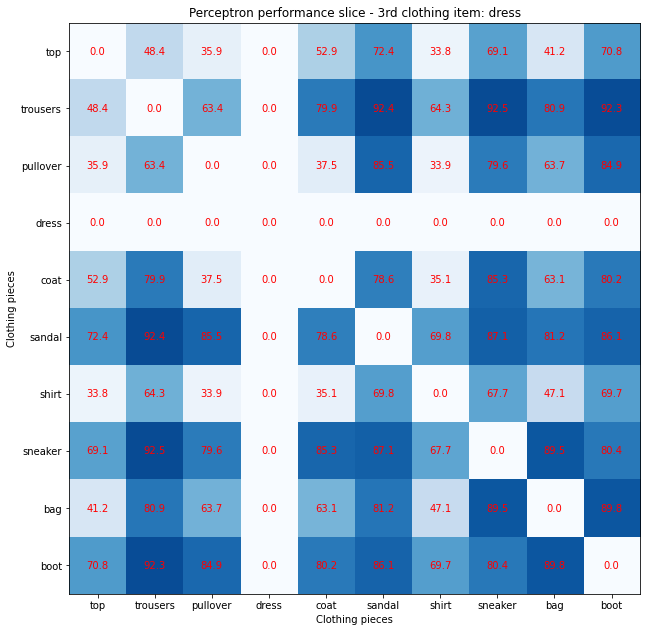

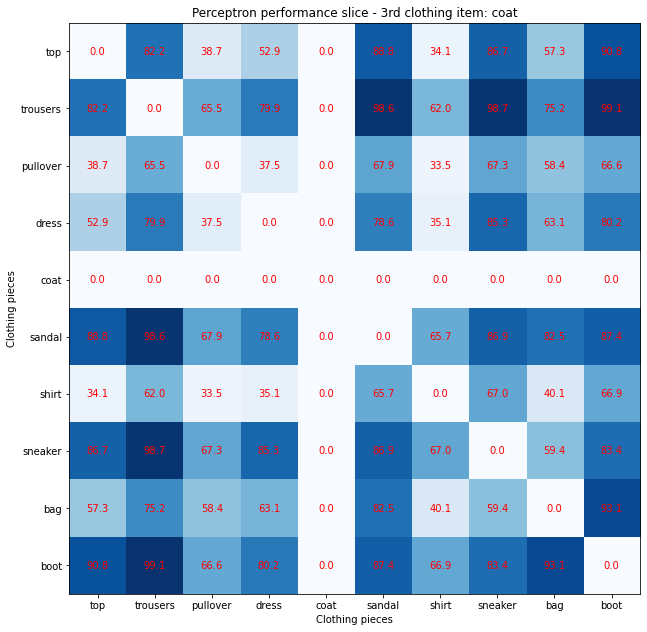

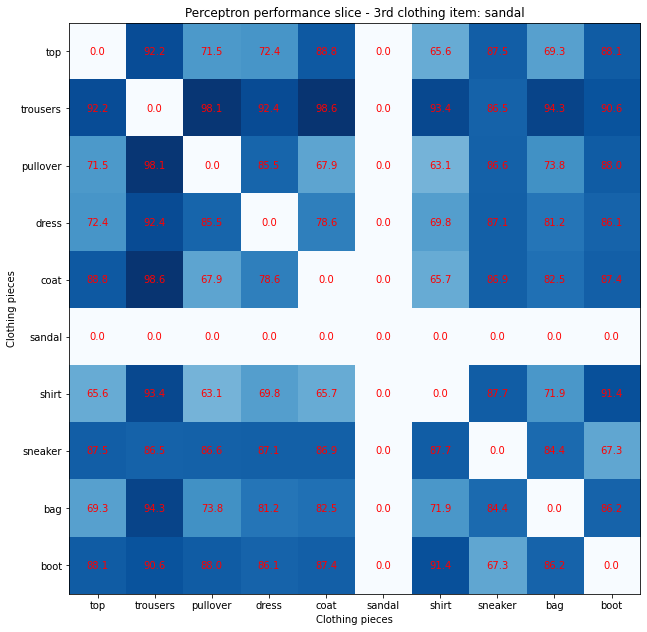

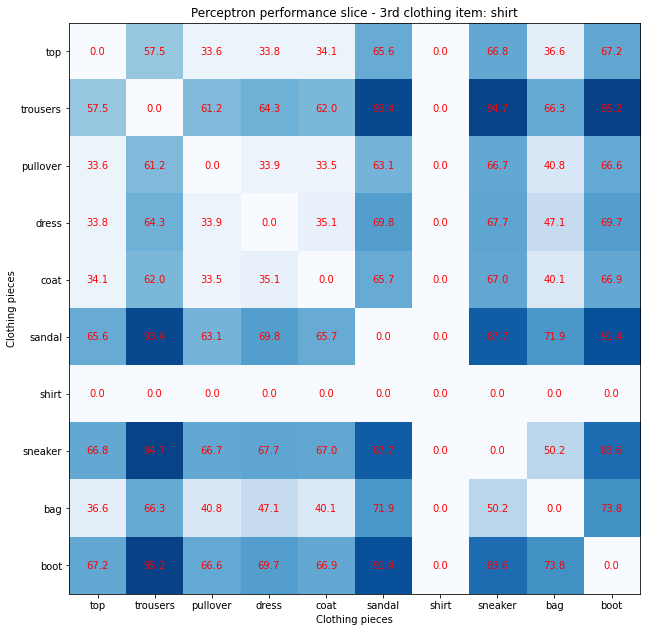

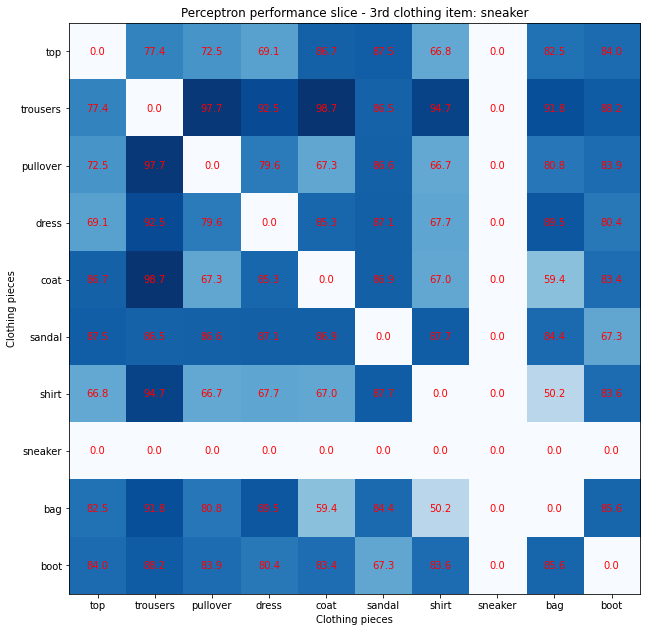

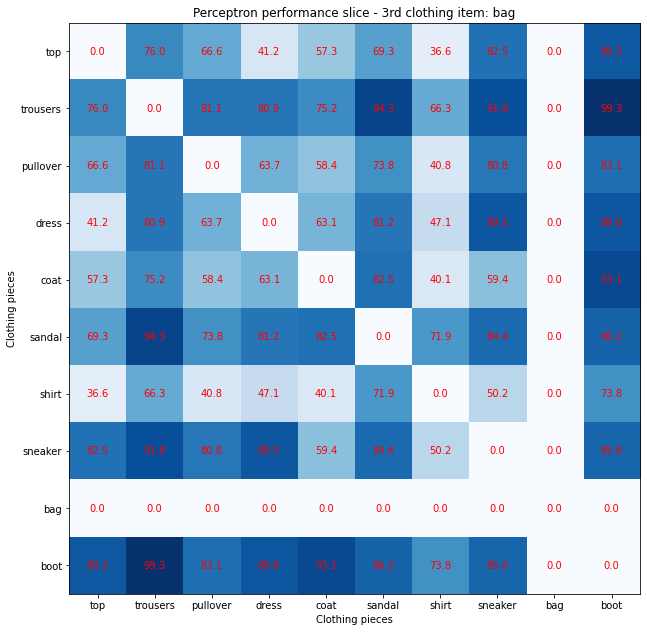

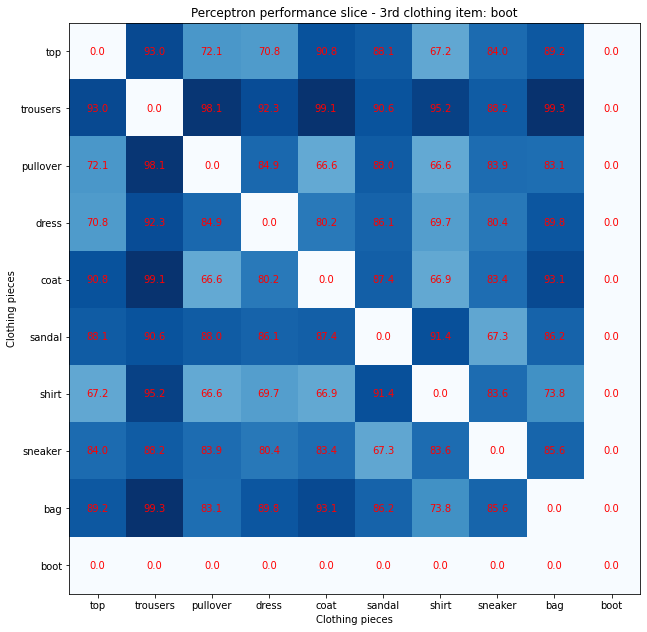

In [37]:
for i in labelDct.keys():
    scores2D = completeArray[i]
    plotter(labelDct,scores2D*100,labelDct[i])

In [53]:
a_1d = completeArray.flatten()

# Find the indices in the 1D array
idx_1d = a_1d.argsort()[-6*10:]

# convert the idx_1d back into indices arrays for each dimension
x_idx, y_idx, z_idx = np.unravel_index(idx_1d, completeArray.shape)

In [54]:
print("Top scoring class triplets:")
count = 0
for x,y,z in zip(x_idx, y_idx, z_idx):
    if count%6 ==0:
        classList = [labelDct[x],labelDct[y],labelDct[z]]
        print("Class list {} scored {}%".format(classList, round(100*completeArray[x,y,z],1)))
    count+=1

Top scoring class triplets:
Class list ['trousers', 'bag', 'sandal'] scored 94.3%
Class list ['sneaker', 'trousers', 'shirt'] scored 94.7%
Class list ['shirt', 'trousers', 'boot'] scored 95.2%
Class list ['pullover', 'trousers', 'sneaker'] scored 97.7%
Class list ['boot', 'trousers', 'pullover'] scored 98.1%
Class list ['sandal', 'pullover', 'trousers'] scored 98.1%
Class list ['trousers', 'sandal', 'coat'] scored 98.6%
Class list ['trousers', 'sneaker', 'coat'] scored 98.7%
Class list ['trousers', 'boot', 'coat'] scored 99.1%
Class list ['bag', 'boot', 'trousers'] scored 99.3%
